In [131]:
from datetime import datetime
from concurrent import futures
import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))
if __name__ == '__main__':
	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)
	""" list of s_anp_p companies """
	s_and_p = ['^IXIC']
		
	bad_names =[] #to keep track of failed queries
	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel
		as opposed to sequentially """
	#set the maximum thread number
	max_workers = 50
	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)
	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')
	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.

^IXIC
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [132]:
df = pd.read_csv('^IXIC_data.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-10,5227.959961,5193.799805,5227.950195,5204.580078,1651240000,5204.580078,^IXIC
1,2016-08-11,5235.290039,5211.250000,5222.149902,5228.399902,1511670000,5228.399902,^IXIC
2,2016-08-12,5233.339844,5215.549805,5219.660156,5232.890137,1501620000,5232.890137,^IXIC
3,2016-08-15,5271.359863,5241.140137,5242.180176,5262.020020,1533170000,5262.020020,^IXIC
4,2016-08-16,5248.259766,5226.779785,5247.959961,5227.109863,1698390000,5227.109863,^IXIC
...,...,...,...,...,...,...,...,...
1254,2021-08-04,14812.370117,14734.120117,14747.209961,14780.530273,4319400000,14780.530273,^IXIC
1255,2021-08-05,14896.469727,14776.030273,14794.080078,14895.120117,4087320000,14895.120117,^IXIC
1256,2021-08-06,14890.179688,14788.589844,14864.219727,14835.759766,4159050000,14835.759766,^IXIC
1257,2021-08-09,14883.809570,14802.690430,14855.759766,14860.179688,4095760000,14860.179688,^IXIC


In [133]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

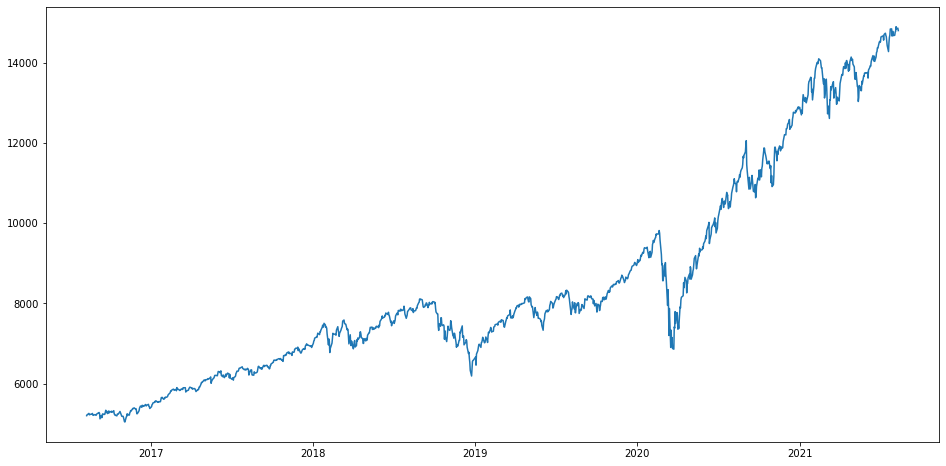

In [134]:
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']

plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history');

In [34]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [35]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [111]:
cutoff = round(df.shape[0]*0.65)
cutoff

818

In [112]:
train = df[:cutoff]
valid = df[cutoff:]

In [113]:
train

,Date,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,,
2016-08-10,2016-08-10,5227.959961,5193.799805,5227.950195,5204.580078,1651240000,5204.580078,^IXIC
2016-08-11,2016-08-11,5235.290039,5211.250000,5222.149902,5228.399902,1511670000,5228.399902,^IXIC
2016-08-12,2016-08-12,5233.339844,5215.549805,5219.660156,5232.890137,1501620000,5232.890137,^IXIC
2016-08-15,2016-08-15,5271.359863,5241.140137,5242.180176,5262.020020,1533170000,5262.020020,^IXIC
2016-08-16,2016-08-16,5248.259766,5226.779785,5247.959961,5227.109863,1698390000,5227.109863,^IXIC
...,...,...,...,...,...,...,...,...
2019-11-01,2019-11-01,8386.750000,8326.559570,8335.049805,8386.400391,2057310000,8386.400391,^IXIC
2019-11-04,2019-11-04,8451.370117,8421.299805,8445.500000,8433.200195,2149910000,8433.200195,^IXIC
2019-11-05,2019-11-05,8457.389648,8421.049805,8446.620117,8434.679688,2316710000,8434.679688,^IXIC


In [114]:
valid

,Date,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,,
2019-11-08,2019-11-08,8475.570312,8405.889648,8422.669922,8475.309570,1974190000,8475.309570,^IXIC
2019-11-11,2019-11-11,8467.290039,8425.480469,8431.259766,8464.280273,1715470000,8464.280273,^IXIC
2019-11-12,2019-11-12,8514.839844,8462.990234,8471.070312,8486.089844,1987820000,8486.089844,^IXIC
2019-11-13,2019-11-13,8496.900391,8451.339844,8455.019531,8482.099609,2173320000,8482.099609,^IXIC
2019-11-14,2019-11-14,8485.360352,8441.580078,8461.059570,8479.019531,2106550000,8479.019531,^IXIC
...,...,...,...,...,...,...,...,...
2021-08-04,2021-08-04,14812.370117,14734.120117,14747.209961,14780.530273,4319400000,14780.530273,^IXIC
2021-08-05,2021-08-05,14896.469727,14776.030273,14794.080078,14895.120117,4087320000,14895.120117,^IXIC
2021-08-06,2021-08-06,14890.179688,14788.589844,14864.219727,14835.759766,4159050000,14835.759766,^IXIC


In [115]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [116]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
2294.023057575536


<ipython-input-117-7a06f5b7bbb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-117-7a06f5b7bbb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


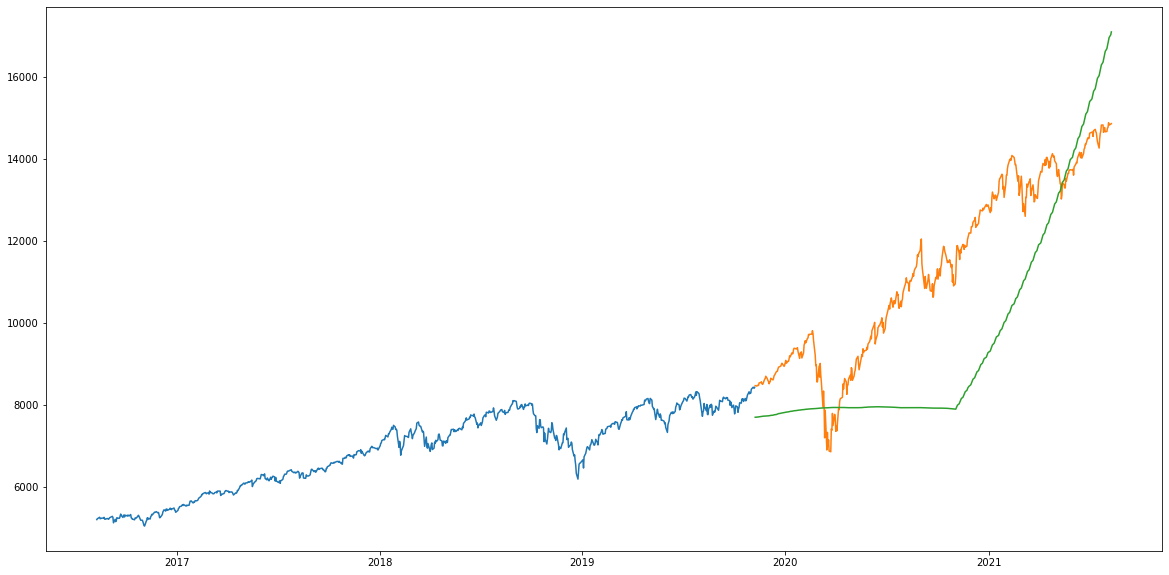

In [117]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']]);

In [118]:
train = new_data[:cutoff]
valid = new_data[cutoff:]

X_train = train.drop('Close', axis=1)
y_train = train['Close']
X_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [120]:
from pmdarima.arima import auto_arima

In [122]:
training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=441)
forecast = pd.DataFrame(forecast, index=valid.index, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=9715.915, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=9514.837, Time=0.44 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=9716.152, Time=0.36 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=9418.221, Time=0.95 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.12 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.16 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9417.889, Time=0.74 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=9515.332, Time=0.28 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.34 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.21 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=9418.048, Time=0.90 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=6.99 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=9419.874, T

In [123]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

734.9847963318435

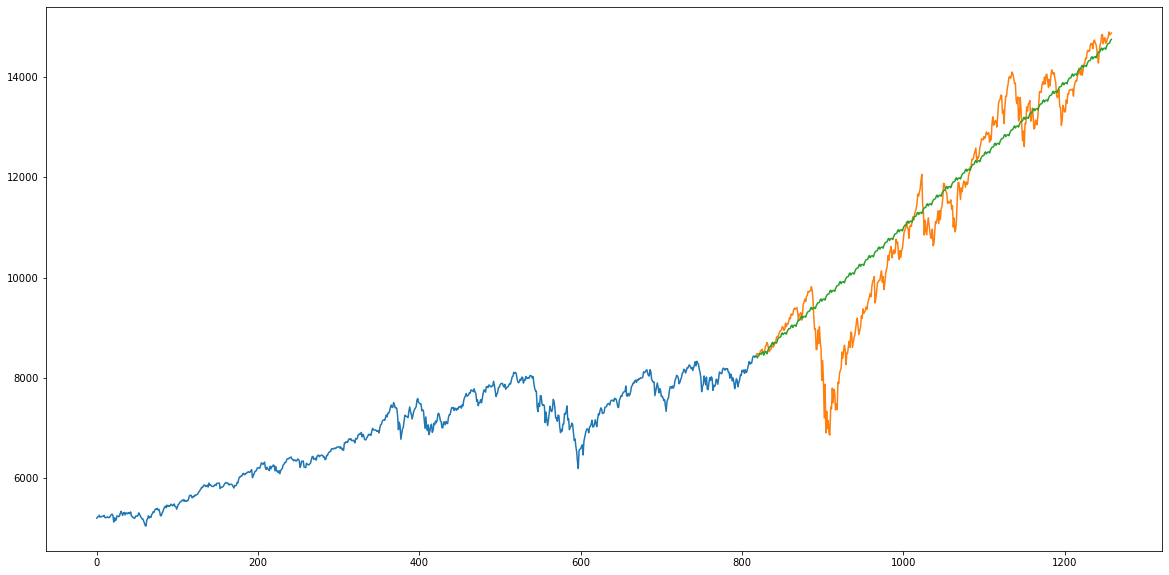

In [124]:
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

# Long Short Term Memory (LSTM)

In [126]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.pythob.keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

ModuleNotFoundError: No module named 'tensorflow'